<a href="https://colab.research.google.com/github/josharsh/DeepLearning/blob/master/Cats%20or%20Dogs/DLFastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64


In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [4]:
path=untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [6]:
path.ls

<bound method <lambda> of PosixPath('/root/.fastai/data/oxford-iiit-pet')>

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno=path/'annonations'

In [0]:
path_img=path/'images'

In [0]:
fnames=get_image_files(path_img)

In [11]:
fnames

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_166.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_159.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_187.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_234.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_12.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_78.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_9.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_167.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_60.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_20.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_59.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_164.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_114.jpg'),
 PosixPath('/root/.fasta

In [0]:
np.random.seed(2)

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224, bs=bs).normalize(imagenet_stats)

In [16]:
data


ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,Bengal,english_setter,saint_bernard,chihuahua
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,miniature_pinscher,english_cocker_spaniel,american_bulldog,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

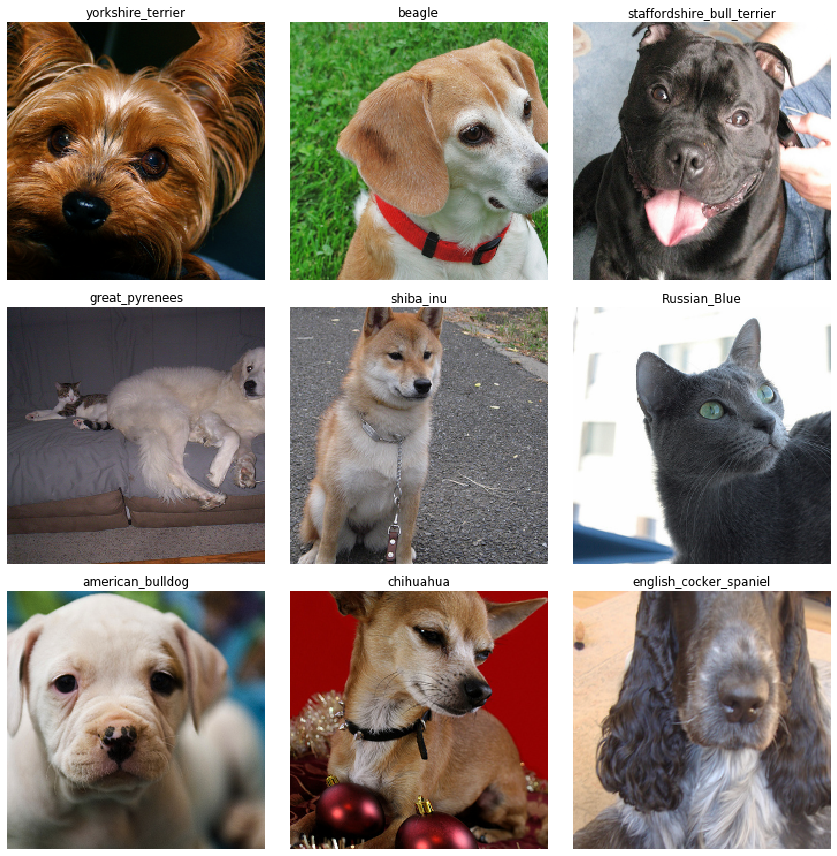

In [17]:
data.show_batch(rows=3)

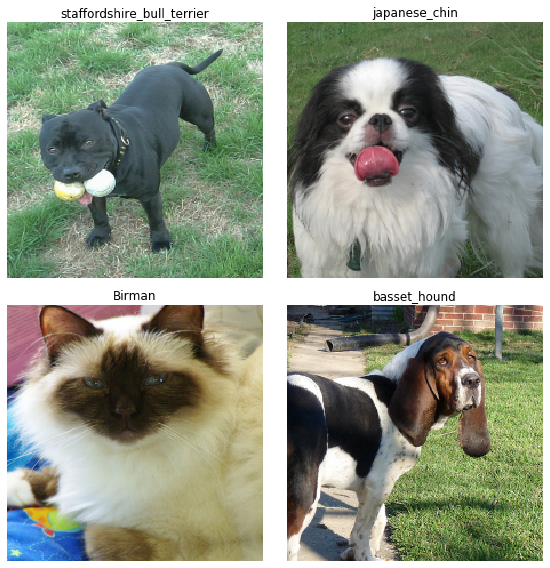

In [18]:
data.show_batch(rows=2,fig_size=(4,4))

In [19]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [20]:
print(data.c)

37


In [21]:
model=cnn_learner(data,models.resnet34,metrics=error_rate)
model.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 43.8MB/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [23]:
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.416323,0.341723,0.104871,01:23
1,0.624699,0.283838,0.087280,01:23
2,0.391567,0.252678,0.082544,01:23
3,0.273809,0.235259,0.065629,01:22


In [0]:
model.save('model-1')

In [25]:
interp=ClassificationInterpretation.from_learner(model)
loss,idx=interp.top_losses()

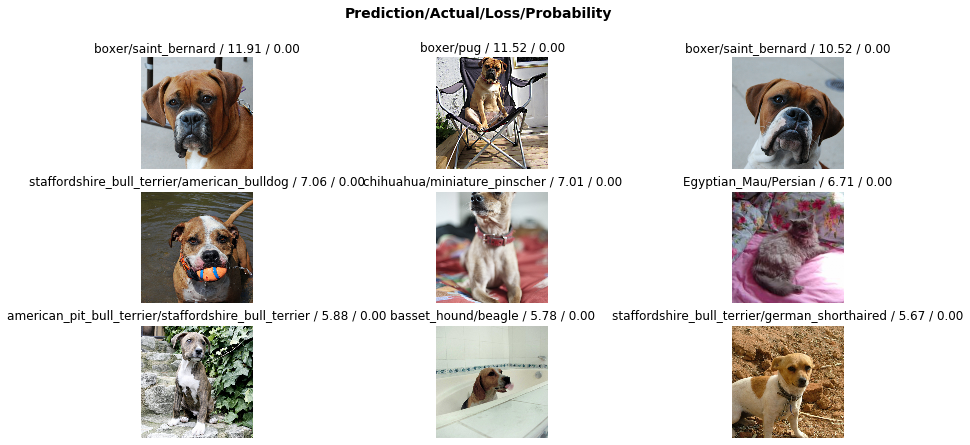

In [27]:
interp.plot_top_losses(9,figsize=(15,7))

In [28]:
interp.most_confused(2)

[('Egyptian_Mau', 'Bengal', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Birman', 'Ragdoll', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('american_pit_bull_terrier', 'miniature_pinscher', 4),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('beagle', 'basset_hound', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Siamese', 'Birman', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('saint_bernard', 'boxer', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
model.unfreeze()

In [30]:
model.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.661357,0.388245,0.114344,01:24


In [31]:
model.load('model-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,Bengal,english_setter,saint_bernard,chihuahua
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,miniature_pinscher,english_cocker_spaniel,american_bulldog,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 

In [32]:
model.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


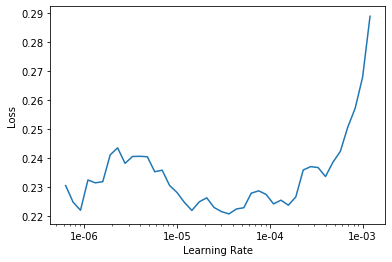

In [33]:
model.recorder.plot()

In [34]:
model.unfreeze()
model.fit_one_cycle(1,max_lr=slice(1e-06,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.232497,0.226062,0.063599,01:23
